In [114]:
pip install mpld3

In [0]:
import numpy as np
import pandas as pd
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3

In [116]:
PATH = "/"
dir_path = os.listdir(PATH)
papers_list = list()
for item in dir_path:
    if ".txt" in item:
        papers_list.append(item)

print(papers_list)

['Lambda-WhitePaper-en.txt', 'BRD-whitepaper-EN.txt', 'Walton_WTC.txt', 'zrx_0x_white_paper.txt', 'XACToken_XAC.txt', 'bitcv_whitepaper_en.txt', 'Enjin-Coin-ENJ-Whitepaper.txt', 'Decentraland_MANA.txt', 'qash_quoine-liquid_v1.9.txt', 'Molecular Future (MOF).txt', 'KaratBank Coin(KBC).txt', 'Token_HEDG.txt', 'chiliZCHZ_whitepaper.txt', 'Matic_Token_MATIC.txt', 'StatusNetwork_SNT.txt', 'Cryptoindex_100.txt', 'Reputation_REP.txt', 'NULS_Whitepaper_2.0.txt', 'Golem_whitepaper.txt', 'DRAGON (DRG).txt', 'Fetch.ai-token-overview.txt', 'bitfinex_leo_wp-2019-05.txt', 'Aion-AION-Whitepaper.txt', 'Seele_White_Paper_English.txt', 'noah_coin.txt', 'Wixlar_WIX_v6.txt', 'Loopring_whitepaper.txt', 'revain.txt', 'EKT.txt', 'IOS-Token-Whitepaper.txt', 'Bankera_whitepaper.txt', 'HuobipoolTokenWhitepaperE.txt', 'ELF_whitepaper_EN.txt', 'Centrality_Token_CENNZ.txt', 'omisego_omg_whitepaper.txt', 'Token_Ino_Coin.txt', 'STASIS_White_Paper_.txt', 'republic-whitepaper.txt', 'cccx_clipper_coincapital.txt', 'DxC

In [0]:
doc_word = list()

for i in range(len(papers_list)):
  doc_word.append(open(PATH +"/"+ papers_list[i]).read())

In [0]:
index = list()
for i in range(len(papers_list)):
  index.append(i)

In [0]:
from bs4 import BeautifulSoup

In [121]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [0]:
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

def tokenize_only(text):
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [0]:
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in doc_word:
    allwords_stemmed = tokenize_and_stem(i)
    totalvocab_stemmed.extend(allwords_stemmed)
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [0]:
vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)

In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.2, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_matrix = tfidf_vectorizer.fit_transform(doc_word)

print(tfidf_matrix.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(94, 1406)


In [0]:
terms = tfidf_vectorizer.get_feature_names()

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

In [0]:
from sklearn.cluster import KMeans
num_clusters = 10
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

In [132]:
pip install joblib

In [0]:
from sklearn.externals import joblib

joblib.dump(km,'doc_cluster.pkl')
km = joblib.load('doc_cluster.pkl')
clusters = km.labels_.tolist()

In [0]:
import pandas as pd
papers = {'papers_list':papers_list, 'index':index, 'cluster':clusters}
frame = pd.DataFrame(papers, index=[clusters], columns=['index', 'papers_list', 'cluster'])

In [135]:
frame['cluster'].value_counts()

3    23
4    20
6    12
5    10
1    10
2     6
8     5
0     4
9     2
7     2
Name: cluster, dtype: int64

In [136]:
grouped = frame['index'].groupby(frame['cluster'])
grouped.mean()

cluster
0    46.500000
1    51.300000
2    29.500000
3    45.304348
4    48.100000
5    49.100000
6    50.583333
7    32.500000
8    44.200000
9    53.500000
Name: index, dtype: float64

In [0]:
import os 

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  

xs, ys = pos[:, 0], pos[:, 1]

In [0]:
cluster_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'gray', 4: 'yellow', 5:'brown', 6:'gray', 7:'brown', 8:'orange', 9:'black'}
%matplotlib inline

No handles with labels found to put in legend.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated


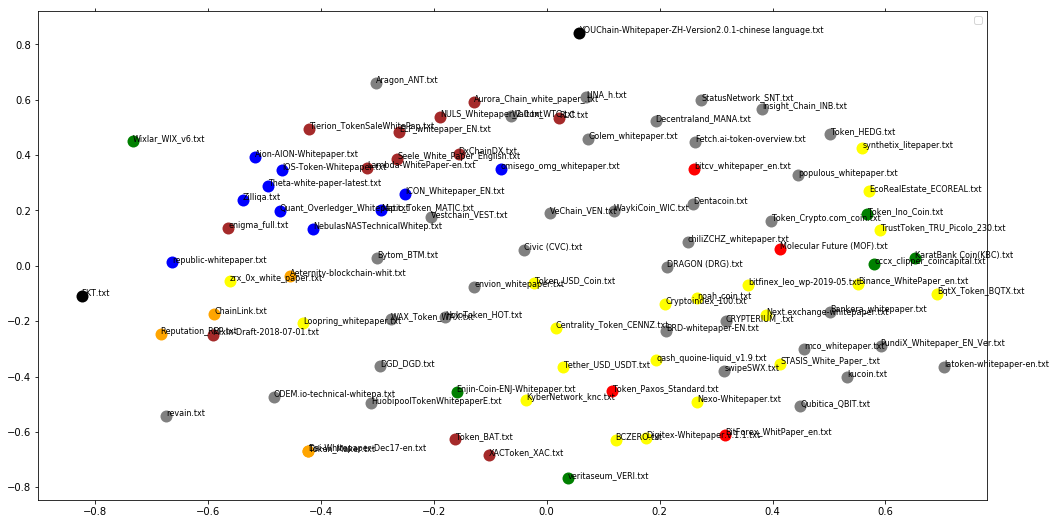

<Figure size 432x288 with 0 Axes>

In [142]:
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=papers_list)) 
groups = df.groupby('label')
fig, ax = plt.subplots(figsize=(17, 9)) 
ax.margins(0.05) 
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, color=cluster_colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          
        which='both',      
        bottom='off',      
        top='off',         
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         
        which='both',      
        left='off',      
        top='off',       
        labelleft='off')
    
ax.legend(numpoints=1)  

for i in range(len(df)):
    ax.text(df.ix[i]['x'], df.ix[i]['y'], df.ix[i]['title'], size=8)  
    
plt.show()
plt.savefig('clusters.png', dpi=200)